# 3. Conversion Attribution
## Building a conversion function
You've been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work. This will both impress your marketing stakeholders and be more fun!

In [1]:
# Import pandas into the environment
import pandas as pd 

# Import marketing.csv with date columns
marketing = pd.read_csv("..//Datasets/marketing.csv",
parse_dates = ["date_served", "date_subscribed", "date_canceled"])

In [2]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe["converted"] == True].groupby(column_names)["user_id"].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)["user_id"].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

## Test and visualize conversion function
You've done the hard work of building your conversion rate function—now it's time to test it out! Automating your analyses can be time-consuming up front, but this is where it all pays off.

In this exercise, you'll see how quickly you can calculate the conversion rate. A task that in previous lessons took multiple steps. By automating the repetitive parts of your work, you'll be able to spend more time doing complex analyses.

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', "age_group"])
age_group_conv

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64

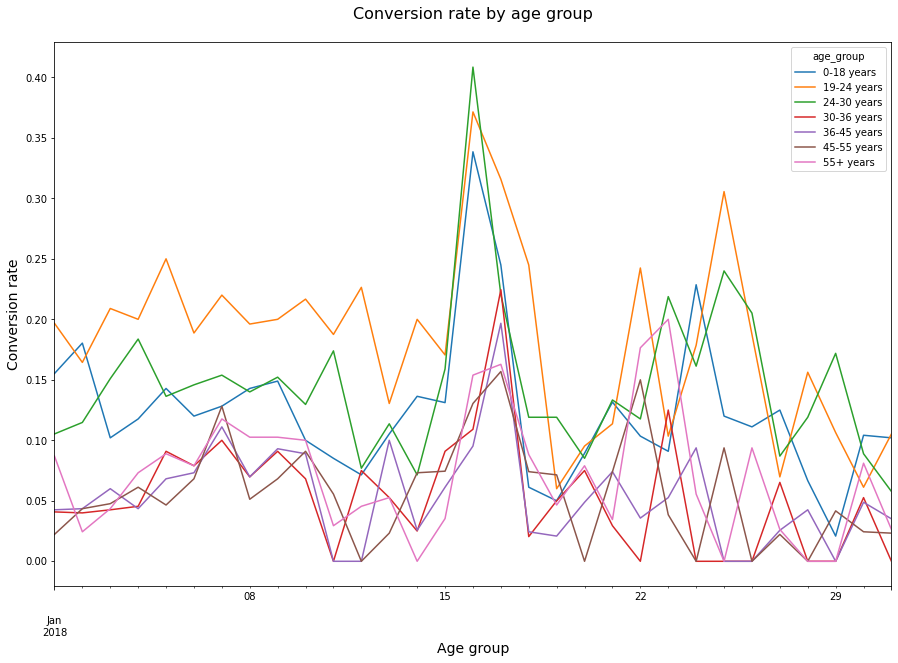

In [4]:
# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot(figsize=(15,10))
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

## Plotting function
Now that you've looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, you need to create a plotting function to make it easier to visualize your results.

In [5]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

## Putting it all together
Your marketing stakeholders have requested a report of the daily conversion rate for each age group, and they need it as soon as possible. They want you to refresh this report on a monthly cadence. This is a perfect opportunity to utilize your functions. Not only will the functions help you get this report out promptly today, but it will also help each month when it's time for a refresh of the data.

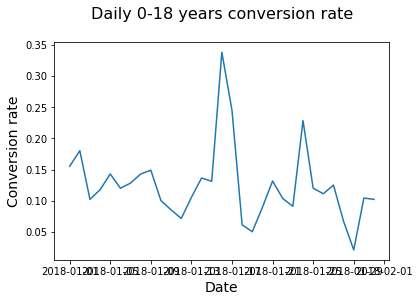

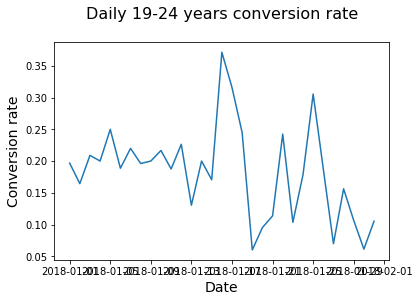

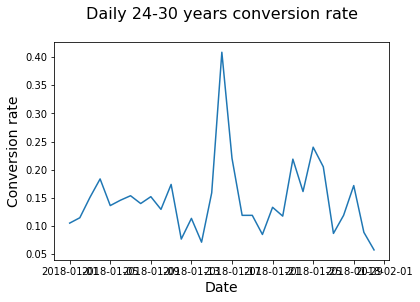

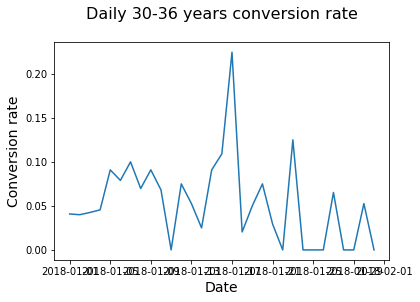

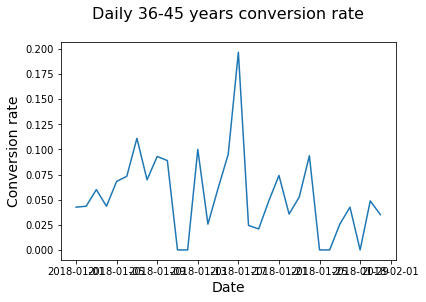

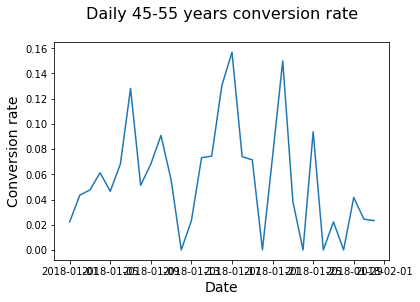

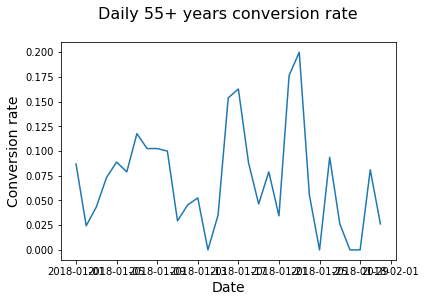

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ["date_served", "age_group"])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

## House ads conversion rate
The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

In [7]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ["date_served", "marketing_channel"])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


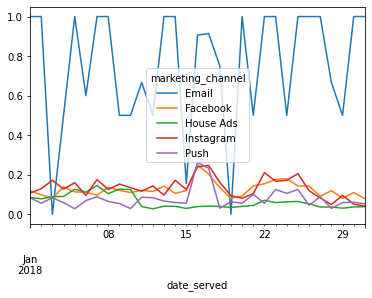

In [8]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
daily_conv_channel.plot()
plt.show()

## Analyzing House ads conversion rate
Now that you have confirmed that house ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

As a data scientist supporting a marketing team, you will run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.

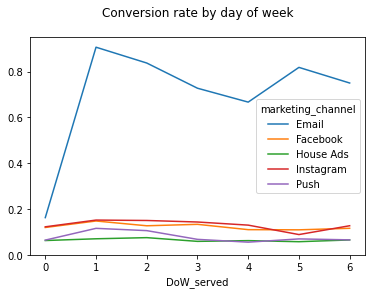

In [9]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

## House ads conversion by language
Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

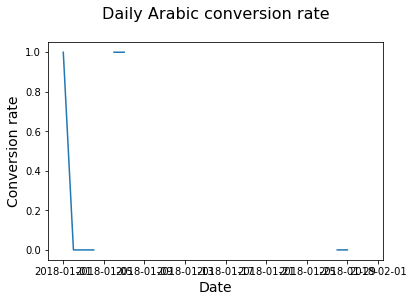

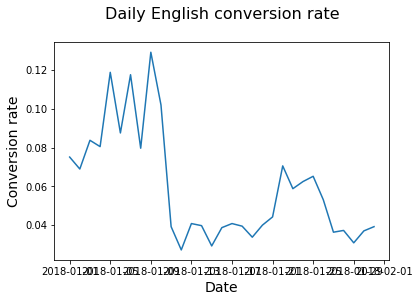

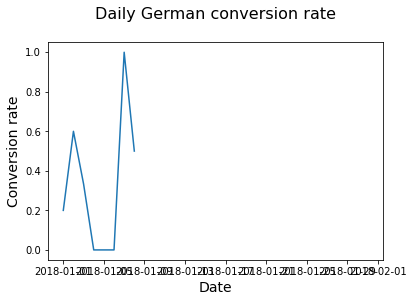

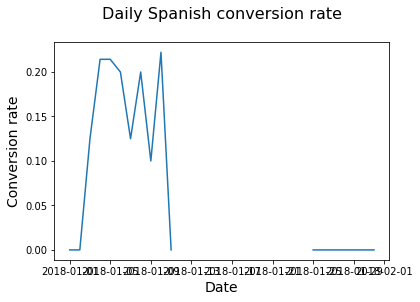

<Figure size 432x288 with 0 Axes>

In [10]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing["marketing_channel"] == "House Ads"]

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ["date_served", "language_displayed"])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

## Creating a DataFrame for house ads
The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

In [11]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(["date_served", "is_correct_lang"])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


<ipython-input-11-d0e14ec542fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


## Setting up conversion indexes
Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In [12]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, "language_displayed")

# Index other language conversion rate against English
spanish_index = lang_conv["Spanish"]/lang_conv["English"]
arabic_index = lang_conv["Arabic"]/lang_conv["English"]
german_index = lang_conv["German"]/lang_conv["English"]

print("Spanish index:", spanish_index.round(2))
print("Arabic index:", arabic_index.round(2))
print("German index:", german_index.round(2))

Spanish index: 1.68
Arabic index: 5.05
German index: 4.49


## Analyzing user preferences
To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In [13]:
# Group house_ads by date and language
converted = house_ads.groupby(["date_served", "language_preferred"])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))